# Tool
一点定义：Tools encapsulate a callable function and its input schema. 

## Create tools

### Basic tool definition
使用 @tool 装饰器 | By default, the function’s docstring becomes the tool’s description that helps the model understand when to use it

### Customize tool properties
参看官方文档吧，没啥好说的，包括工具的命名、描述等：[文档](https://docs.langchain.com/oss/python/langchain/tools#customize-tool-properties)

### Advanced schema definition
使用 Pydantic models or JSON schemas 定义复杂输入：

## ToolRuntime
获取运行时信息：

In [ ]:
from langchain.tools import tool, ToolRuntime

# Access the current conversation state
@tool
def summarize_conversation(
    runtime: ToolRuntime
) -> str:
    """Summarize the conversation so far."""
    messages = runtime.state["messages"]

    human_msgs = sum(1 for m in messages if m.__class__.__name__ == "HumanMessage")
    ai_msgs = sum(1 for m in messages if m.__class__.__name__ == "AIMessage")
    tool_msgs = sum(1 for m in messages if m.__class__.__name__ == "ToolMessage")

    return f"Conversation has {human_msgs} user messages, {ai_msgs} AI responses, and {tool_msgs} tool results"

# Access custom state fields
@tool
def get_user_preference(
    pref_name: str,
    runtime: ToolRuntime  # ToolRuntime parameter is not visible to the model
) -> str:
    """Get a user preference value."""
    preferences = runtime.state.get("user_preferences", {})
    return preferences.get(pref_name, "Not set")

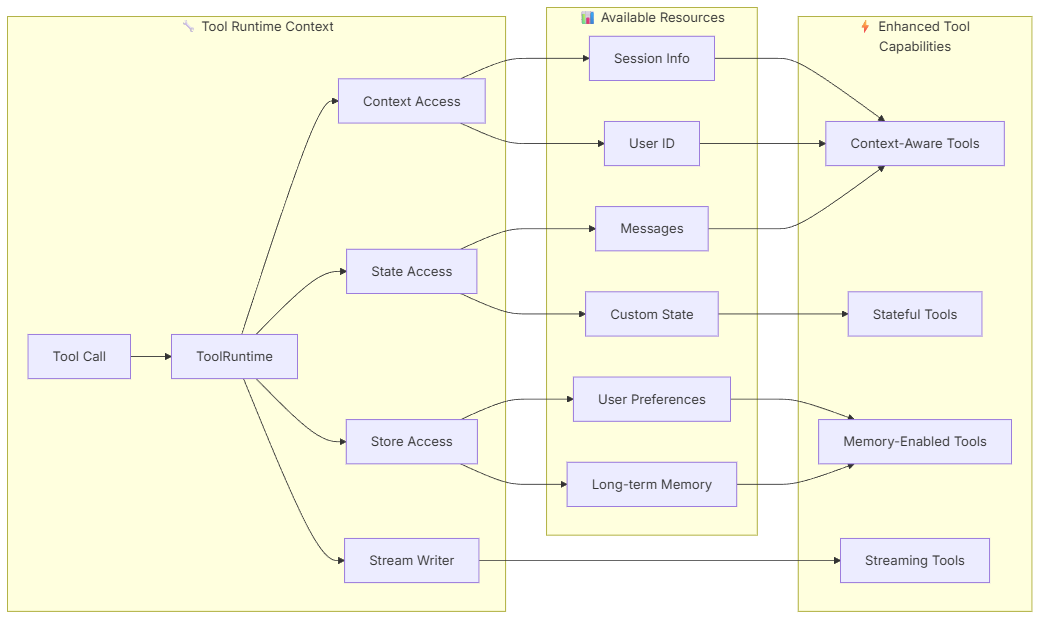